<a href="https://colab.research.google.com/github/SytzeSimonse/DeepLearning_MGI/blob/master/MGIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRS-34806 MGI Project
## 1) Download the data
This template downloads the UCM data (both mono and multi-labels) in your local Colab environment. Write the notebook in such a way that it fully runs from start to end without further intervention (i.e. do not change the directory structure manually in the mean time).

In [0]:
### Import data

import os
import zipfile

! git clone https://git.wur.nl/lobry001/ucmdata.git
os.chdir('ucmdata')

with zipfile.ZipFile('UCMerced_LandUse.zip', 'r') as zip_ref:
    zip_ref.extractall('UCMImages')

!mv UCMImages/UCMerced_LandUse/Images .
!rm -rf UCMImages README.md  UCMerced_LandUse.zip
!ls

UCM_images_path = "Images/"
Multilabels_path = "LandUse_Multilabeled.txt"

os.listdir(UCM_images_path)

Cloning into 'ucmdata'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
Images	LandUse_Multilabeled.txt


['runway',
 'parkinglot',
 'river',
 'sparseresidential',
 'denseresidential',
 'baseballdiamond',
 'tenniscourt',
 'overpass',
 'freeway',
 'mobilehomepark',
 'golfcourse',
 'forest',
 'beach',
 'airplane',
 'chaparral',
 'harbor',
 'buildings',
 'agricultural',
 'intersection',
 'mediumresidential',
 'storagetanks']

In [0]:
# https://mxnet.incubator.apache.org/api/python/docs/tutorials/packages/gluon/data/datasets.html



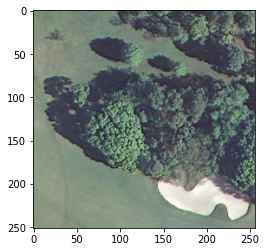

['LandUse_Multilabeled.txt', 'Images', '.git']


In [0]:
## show folder structure / image 

labels = os.listdir(UCM_images_path)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(UCM_images_path + 'golfcourse/golfcourse05.tif')
imgplot = plt.imshow(img)
plt.show()

p=os.listdir('.')
print(p)


<class 'mxnet.ndarray.ndarray.NDArray'>


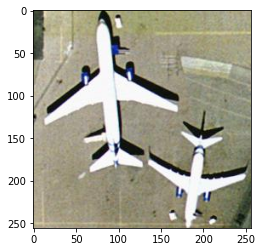

1 parkinglot


In [0]:
import numpy as np
import random
from PIL import Image
#a = np.arange(100)
#np.random.shuffle(a)

#imgplot = plt.imshow(train_dataset[1][0])
#plt.show()
imagenumber = 100
print(type(train_dataset[imagenumber][0]))
thisimage = train_dataset[imagenumber][0]
#img = Image.fromarray(thisimage.asnumpy(), 'RGB')
#img.show()
imgplot = plt.imshow(thisimage.asnumpy())
plt.show()
print(train_dataset[imagenumber][1], labels[train_dataset[imagenumber][1]])

In [0]:
# install mxnet and import gluon
! pip install mxnet --pre -q
from mxnet import gluon, image

In [0]:
# prepare data 

# https://gluon-cv.mxnet.io/build/examples_datasets/recordio.html

# prepare and split the data
import os
import numpy as np
from shutil import rmtree
import mxnet as mx
from PIL import Image


#split
train = 70
test = 15
val = 15

# Make folders for the split data 
destFolder = 'preparedData/'
trainFolder = destFolder+'train/'
testFolder = destFolder+'test/'
valFolder = destFolder+'val/'

if os.path.isdir(destFolder):
  os.rmtree(destFolder)


os.mkdir(destFolder)
os.mkdir(trainFolder)
os.mkdir(testFolder)
os.mkdir(valFolder)

# get the class labels and loop over their folders
labels = os.listdir(UCM_images_path)
for l in labels:
  imgs = os.listdir(UCM_images_path+l)

  # Make the destination folders
  if not os.path.isdir(trainFolder + l):
    os.mkdir(trainFolder + l)
  if not os.path.isdir(testFolder + l):
    os.mkdir(testFolder + l)
  if not os.path.isdir(valFolder + l):
    os.mkdir(valFolder + l)

  #generate the numbers 0-99 in random order
  split = np.arange(100)
  np.random.shuffle(split)

  # copy images to train data folder and convert to jpeg
  for i in range(train):
    imgno = np.char.zfill(str(split[i]),2)
    im = Image.open(UCM_images_path + l +'/' + l + str(imgno) + '.tif')
    im.save(trainFolder + l +'/' + l + str(imgno) + '.jpeg')
    #copyfile(UCM_images_path + l +'/' + l + str(imgno) + '.tif', 
    #         trainFolder + l +'/' + l + str(imgno) + '.tif')
  
  # copy images to test data folder and convert to jpeg
  for i in range(test):
    imgno = np.char.zfill(str(split[i+train]),2)
    im = Image.open(UCM_images_path + l +'/' + l + str(imgno) + '.tif')
    im.save(testFolder + l +'/' + l + str(imgno) + '.jpeg')
    #copyfile(UCM_images_path + l +'/' + l + str(imgno) + '.tif', 
    #         testFolder + l +'/' + l + str(imgno) + '.tif')
  
  # copy images to validation data folder and convert to jpeg
  for i in range(val):
    imgno = np.char.zfill(str(split[i+train+test]),2)
    im = Image.open(UCM_images_path + l +'/' + l + str(imgno) + '.tif')
    im.save(valFolder + l +'/' + l + str(imgno) + '.jpeg')
    #copyfile(UCM_images_path + l +'/' + l + str(imgno) + '.tif', 
    #         valFolder + l +'/' + l + str(imgno) + '.tif')  

train_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(trainFolder)
test_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(testFolder)
val_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(valFolder)


# get the im2rec script
#! git clone https://github.com/apache/incubator-mxnet.git

# create the .lst and .rec files for the training set
#! python incubator-mxnet/tools/im2rec.py ./preparedData/train ./preparedData/train --recursive --list --num-thread 8
#! python incubator-mxnet/tools/im2rec.py ./preparedData/train ./preparedData/train --recursive --pass-through --pack-label --num-thread 8

# create the .lst and .rec files for the validation set
#! python incubator-mxnet/tools/im2rec.py ./preparedData/val ./preparedData/val --recursive --list --num-thread 8
#! python incubator-mxnet/tools/im2rec.py ./preparedData/val ./preparedData/val --recursive --pass-through --pack-label --no-shuffle --num-thread 8

#! ls
#! cd preparedData/
#! ls
#print(os.listdir("preparedData/"))

# works till here
# def download_pikachu(data_dir):
#    dataset = {'train.rec': 'e6bcb6ffba1ac04ff8a9b1115e650af56ee969c8', # create these files
#               'train.idx': 'dcf7318b2602c06428b9988470c731621716c393',
#               'val.rec': 'd6c33f799b4d058e82f2cb5bd9a976f69d72d520'}
#    for k, v in dataset.items():
#        gluon.utils.download(
#            root_url + k, os.path.join(data_dir, k), sha1_hash=v)
        

# Function to load the data and return training and validation d
#def load_data_pikachu(batch_size, edge_size=256):
##    """Load the UCM dataset"""
 #   data_dir = './preparedData'
 #   # download_pikachu(data_dir)
 #   train_iter = image.ImageDetIter(
 #       path_imgrec = os.path.join(data_dir, 'train.rec'),
 #       path_imglist = os.path.join(data_dir, 'train.lst'),
 #       path_imgidx = os.path.join(data_dir, 'train.idx'),
 #       batch_size = batch_size,
 #       data_shape = (3, edge_size, edge_size)
 #       )
    # val_iter = image.ImageDetIter(
        #path_imgrec=os.path.join(data_dir, 'val.rec'), batch_size=batch_size,
        # data_shape=(3, edge_size, edge_size), shuffle=False)
#    return train_iter, val_iter

#load_data_pikachu(10)

In [0]:
!pip install git+https://github.com/d2l-ai/d2l-en # installing d2l
import d2l

  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-gw2zjwxa
  Running command git clone -q https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-gw2zjwxa
  Created wheel for d2l: filename=d2l-0.11.4-cp36-none-any.whl size=31941 sha256=7a335adb7925b7ea8ef199522007be3fc36e2e7f64a354525990eea047cab6d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-8g4jgpz3/wheels/82/6f/b8/8422c7ed664272685e3d139b127f89df39d934704a14b2156c
Successfully built d2l


In [0]:
#https://classic.d2l.ai/chapter_computer-vision/fine-tuning.html
from mxnet import gluon, gpu


def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5):
    train_iter = gluon.data.DataLoader(
        train_dataset.transform_first(train_augs), batch_size, shuffle=True)
    test_iter = gluon.data.DataLoader(
        test_dataset.transform_first(test_augs), batch_size)
    ctx = d2l.try_all_gpus()
    net.collect_params().reset_ctx(ctx)
    net.hybridize()
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate, 'wd': 0.001})
    d2l.train_ch12(net, train_iter, test_iter, loss, trainer, num_epochs, ctx

normalize = gluon.data.vision.transforms.Normalize(
    [0.1, 0.1, 0.1], [0.1, 0.1, 0.1])

train_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.RandomResizedCrop(224),
    gluon.data.vision.transforms.RandomFlipLeftRight(),
    gluon.data.vision.transforms.ToTensor(),
    normalize])

test_augs = gluon.data.vision.transforms.Compose([
    gluon.data.vision.transforms.Resize(256),
    gluon.data.vision.transforms.CenterCrop(224),
    gluon.data.vision.transforms.ToTensor(),
    normalize])

pretrained_alexnet  = gluon.model_zoo.vision.alexnet(pretrained=True) ## AlexNet ##
train_fine_tuning(pretrained_alexnet, 0.01)


In [0]:


! pip install mxnet --pre -q
from mxnet import gluon, gpu

# load pre-trained networks
pretrained_resnet   = gluon.model_zoo.vision.resnet18_v2(pretrained=True) ## Resnet18_v2 ##
pretrained_alexnet  = gluon.model_zoo.vision.alexnet(pretrained=True) ## AlexNet ##

## Function to finetune pre-trained network:
# net: pre-trained network to finetune
# learning_rate [int]: rate of updating parameters
# batch_size [int]: size of mini batch(es)
def train_fine_tuning(net, train_data, test_data, learning_rate = 0.01, batch_size = 128):
  # load all parameters of pre-trained model
  params = net.collect_params()

  # create loss function
  loss = gluon.loss.SoftmaxCrossEntropyLoss()
  
  # create optimizer (stocastic gradient descent)
  sgd = optimizer.Optimizer.create_optimizer('sgd')

  # create trainer with sgd
  trainer = gluon.Trainer(params, sgd, 
                          optimizer_params{
                              'learning_rate': learning_rate, 
                              'wd': 0.001 # weight decay
                              }
  )

  # train again
  train(net, train_iter, test_iter, loss, trainer, num_epochs = 50)

def train(net, train_set, test_set, loss, trainer, num_epochs):
  # loop through epochs
  for epoch in range(num_epochs):

    # save weights

    # print loss

    # print train accuracy

    # print test accuracy

    # print passed time 


SyntaxError: ignored

In [0]:
## Train network for multi label classification
## How???